In [10]:
from pathlib import Path
import numpy as np
import torch
import math
from tqdm import tqdm
from torchvision.datasets import CocoDetection
import matplotlib.pyplot as plt
import torchvision
import os

In [2]:
from abbyy_course_cvdl_t3.coco_text import COCO_Text
from abbyy_course_cvdl_t3 import coco_evaluation
from abbyy_course_cvdl_t3.utils import evaluate_ap_from_cocotext_json
from abbyy_course_cvdl_t3.utils import dump_detections_to_cocotext_json

In [3]:
cd ../task2

/home/alexander/computerScience/phystech/9sem/abbyy/course_cvdl/task2


In [4]:
import abbyy_course_cvdl_t2
from abbyy_course_cvdl_t2.convert import PointsToObjects, ObjectsToPoints
from abbyy_course_cvdl_t2.impl.train import train
from abbyy_course_cvdl_t2.impl.data import CocoTextDetection, CocoDetectionPrepareTransform
from abbyy_course_cvdl_t2.network import CenterNet
from abbyy_course_cvdl_t2.loss import CenterNetLoss

In [5]:
cd ../task3

/home/alexander/computerScience/phystech/9sem/abbyy/course_cvdl/task3


In [9]:
base = Path("/home/alexander/Downloads/coco2014")
anno_path = base / 'cocotext.v2.json'
images_path = base / 'images/train2014'
pred_path = 'predictions.json'

assert anno_path.exists(), "Set your own path to annotation"
assert images_path.exists(), "Set your own path to images"


ct = COCO_Text(anno_path)

loading annotations into memory...
0:00:01.966502
creating index...
index created!


Loading and preparing results...     
DONE (t=0.24s)


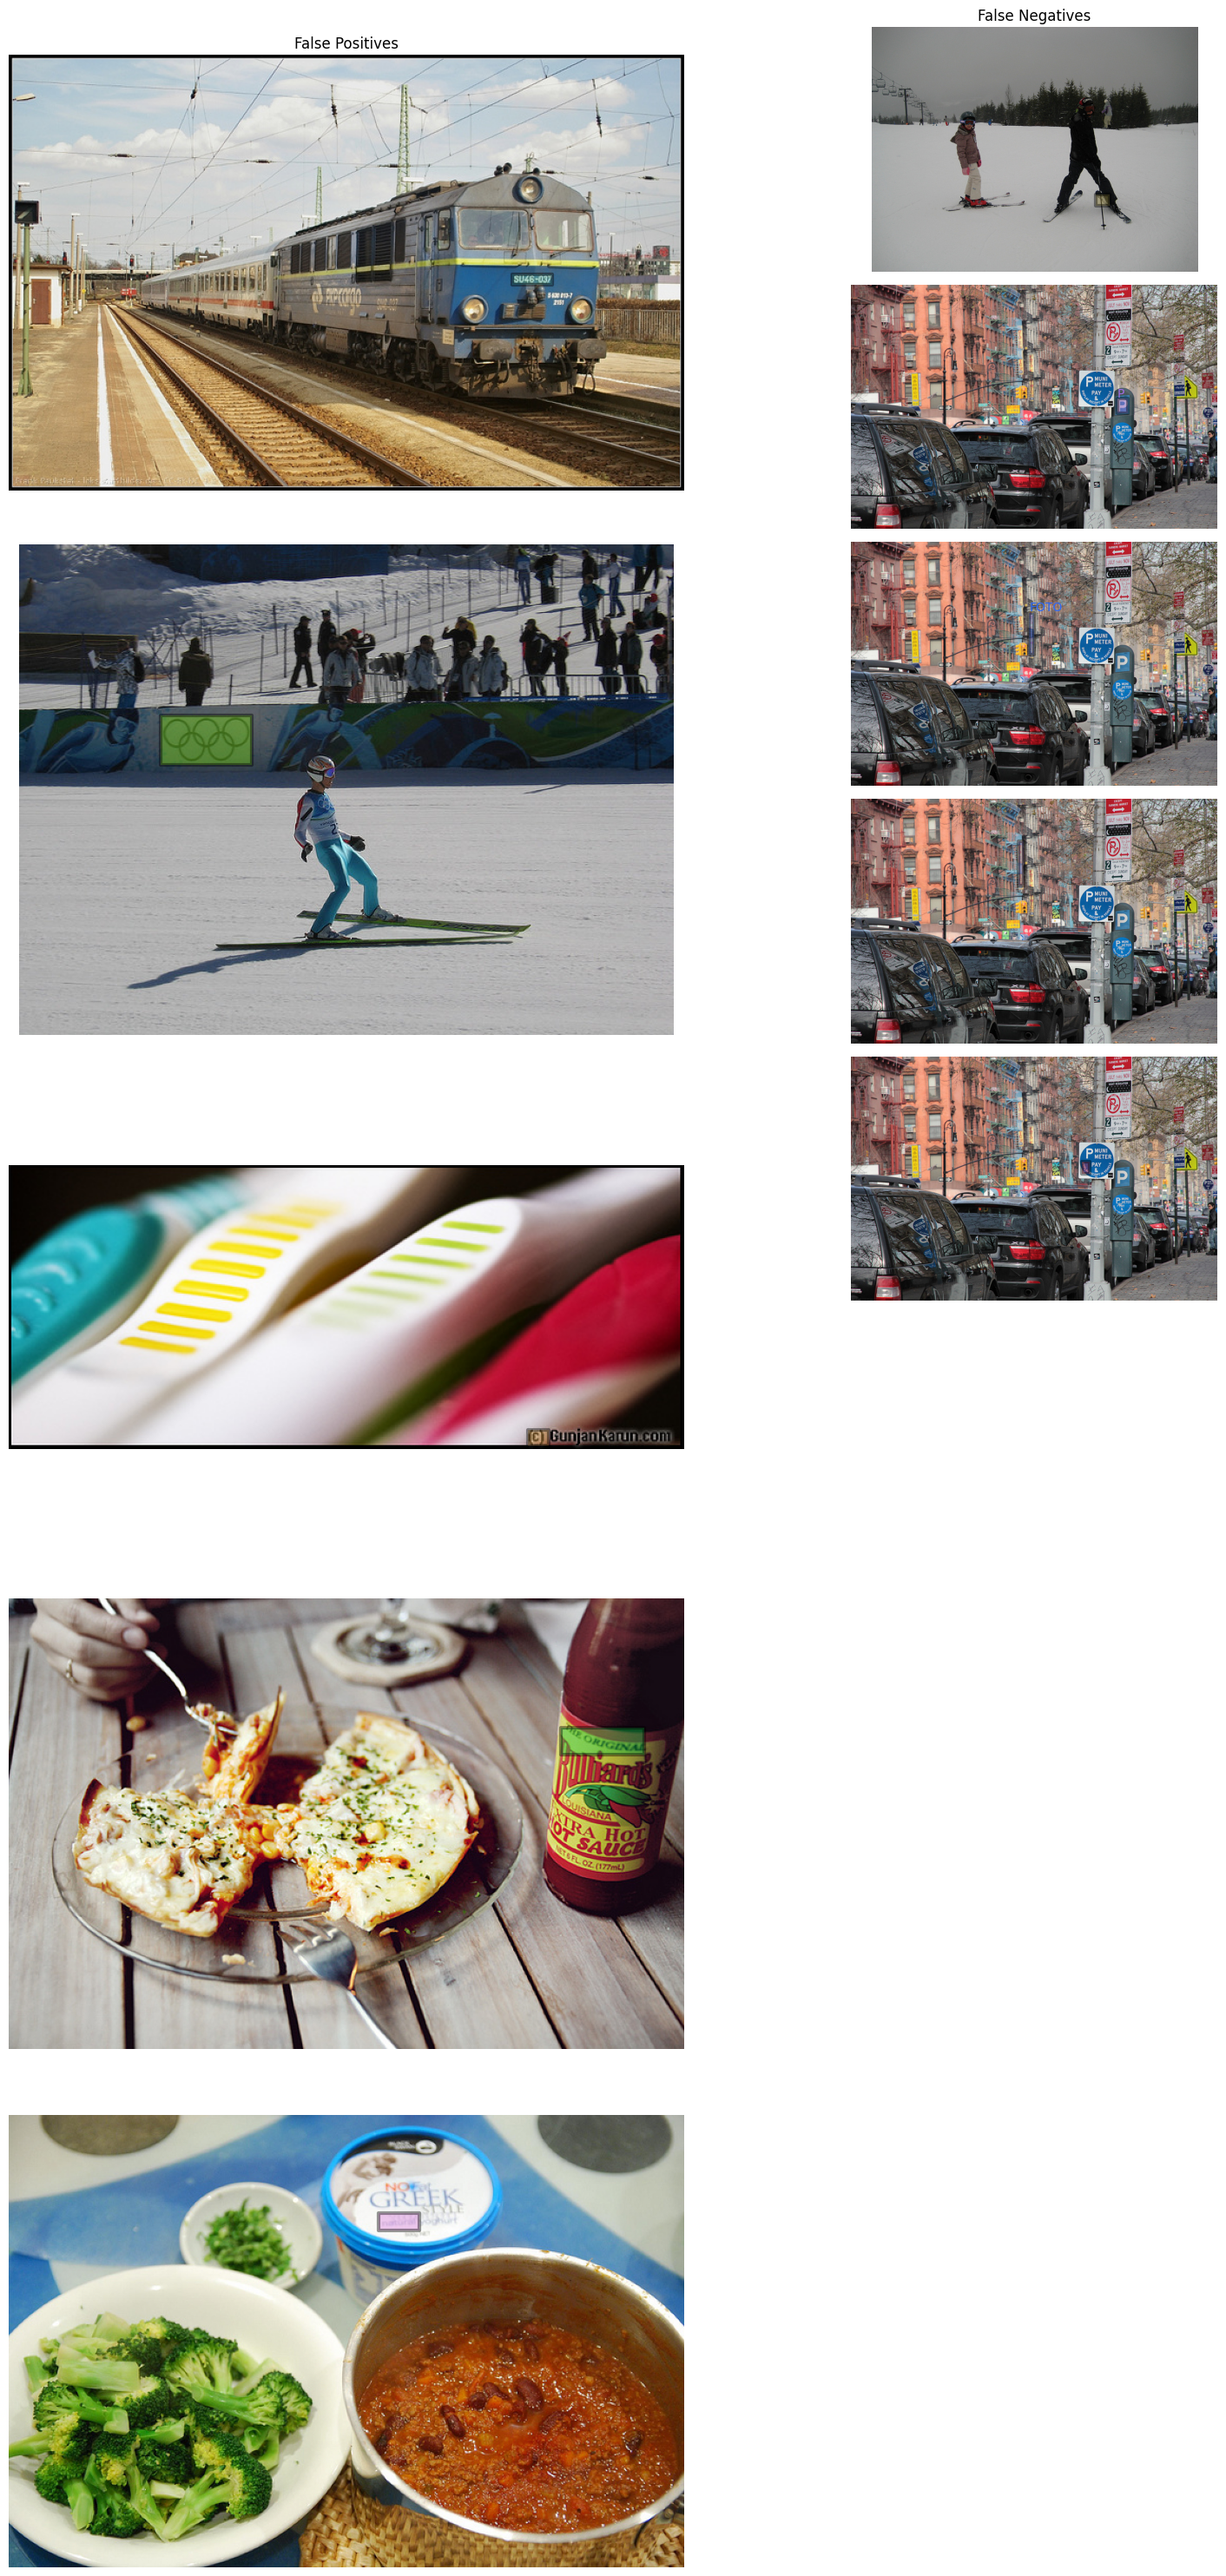

In [15]:
results = ct.loadRes(str(pred_path))

matches = coco_evaluation.getDetections(
    ct,
    results,
    imgIds=ct.val,
    score_threshold=0.5,
    area_fraction_threshold=1. / 32 / 32
)

fp_examples = matches['false_positives'][0:5]
fn_examples = matches['false_negatives'][0:5]

plt.figure(figsize=(16, 30))
for i, (fp_example, fn_example) in enumerate(zip(fp_examples, fn_examples)):
    plt.subplot(5, 2, i * 2 + 1)
    ann = results.loadAnns(fp_example['eval_id'])[0]
    img = results.loadImgs(ann['image_id'])[0]
    plt.imshow(plt.imread(os.path.join(images_path, img['file_name'])))
    results.showAnns([ann])
    plt.axis('off')
    if i == 0:
        plt.title('False Positives')

    plt.subplot(5, 2, i * 2 + 2)
    ann = ct.loadAnns(fn_example['gt_id'])[0]
    img = ct.loadImgs(ann['image_id'])[0]
    plt.imshow(plt.imread(os.path.join(images_path, img['file_name'])))
    ct.showAnns([ann])
    plt.axis('off')
    if i == 0:
        plt.title('False Negatives')

plt.tight_layout()
plt.savefig('errors.png')
plt.show()